In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

***Data Collection and Preparation***

In [2]:
df=pd.read_csv(r"C:\Users\pr503\Projects\Heart\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
target=df.target
df=df[['age','sex','trestbps','chol','fbs','thalach','exang','oldpeak']]

In [5]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak
0,52,1,125,212,0,168,0,1.0
1,53,1,140,203,1,155,1,3.1
2,70,1,145,174,0,125,1,2.6
3,61,1,148,203,0,161,0,0.0
4,62,0,138,294,1,106,0,1.9


In [6]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

***Splitting data to train and test***

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df,target,test_size=0.25)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 8)
(257, 8)
(768,)
(257,)


***Model Training***

In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
base_model= SVC(kernel='rbf', C=14.5, random_state=1)
model = AdaBoostClassifier(base_model, n_estimators=50, learning_rate=1, random_state=42, algorithm='SAMME')
model.fit(X_train_std, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=SVC(C=14.5, random_state=1),
                   learning_rate=1, random_state=42)

***Training and Testing Accuracy***

In [12]:
train_accuracy = model.score(X_train_std, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = model.score(X_test_std, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8098958333333334
Testing Accuracy: 0.8093385214007782


***Cross Validation***

In [13]:
cv_scores = cross_val_score(model, df, target, cv=5)
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean Cross-Validated Accuracy:", cv_scores.mean())

Cross-Validated Accuracy Scores: [0.51219512 0.51219512 0.51219512 0.51219512 0.51707317]
Mean Cross-Validated Accuracy: 0.5131707317073171


***Learning Curve***

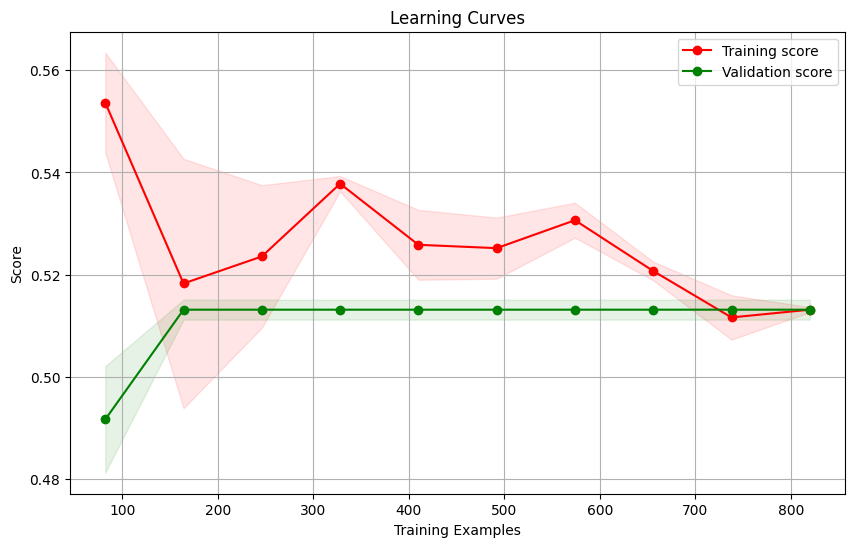

In [14]:
train_sizes, train_scores, test_scores = learning_curve(model, df, target, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

plt.legend(loc="best")

plt.show()

***Confusion Matrix***

In [15]:
y_pred=model.predict(X_test_std)

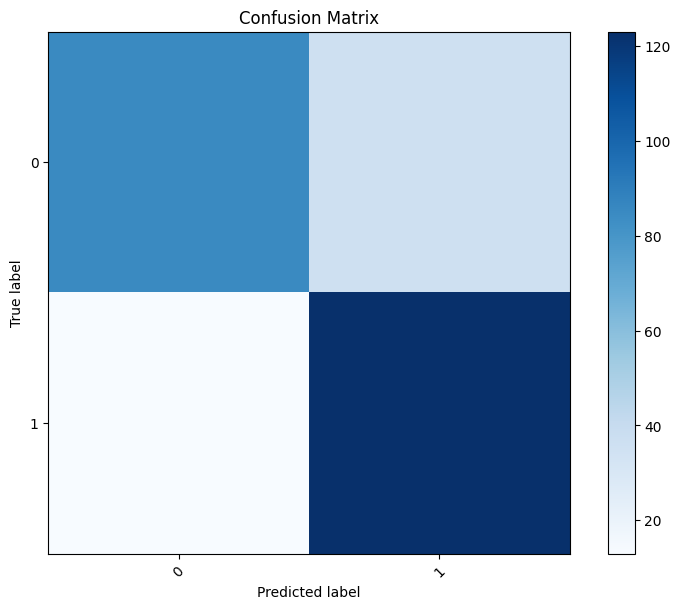

In [16]:
confusion4 = confusion_matrix(y_test, y_pred)

classes = ['0','1']

plt.figure(figsize=(8, 6))
plt.imshow(confusion4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

***Classification Report***

In [17]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       121
           1       0.77      0.90      0.83       136

    accuracy                           0.81       257
   macro avg       0.82      0.80      0.81       257
weighted avg       0.82      0.81      0.81       257

